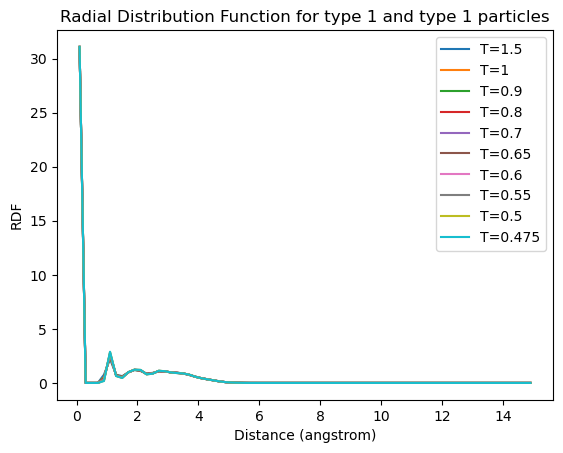

In [3]:
import MDAnalysis
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from MDAnalysis.analysis import msd

run = {'1.5': '10000', '1': '50000',
       '0.9': '150000', '0.8': '150000', 
       '0.7': '180000', '0.65': '350000', 
       '0.6': '1000000', '0.55': '3000000', 
       '0.5': '10000000', '0.475': '30000000', 
       '0.45': '100000000'}
prod_data = dict(zip(run.keys(), [None]*len(run.keys())))
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    prod_data[str(t)] = MDAnalysis.Universe(f"../Data/equil/kalj_T{t}_n360_v300_{run[str(t)]}_1.lammpstrj", 
                                            f"../Data/prod/kalj_T{t}_n360_v300_prod_{run[str(t)]}_1.unwrap.dcd",
                                            topology_format="LAMMPSDUMP")

def cal_rdf(prod_data):
    type1 = prod_data.select_atoms("type 1")
    type2 = prod_data.select_atoms("type 2")

    rdf_11 = rdf.InterRDF(type1, type1).run()
    rdf_22 = rdf.InterRDF(type2, type2).run()
    rdf_12 = rdf.InterRDF(type1, type2).run()
    return rdf_11, rdf_22, rdf_12

def cal_msd(prod_data):
    type1 = prod_data.select_atoms("type 1")

    msd1 = msd.EinsteinMSD(type1).run()
    return msd1

rdf_dict = {}
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    rdf_dict[t] = cal_rdf(prod_data[str(t)])


for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    plt.plot(rdf_dict[t][0].bins, rdf_dict[t][0].rdf, label=f"T={t}")
plt.xlabel('Distance (angstrom)')
plt.ylabel('RDF')
plt.legend()
plt.title('radial distribution function between type 1 and type 1 particles')
plt.show()

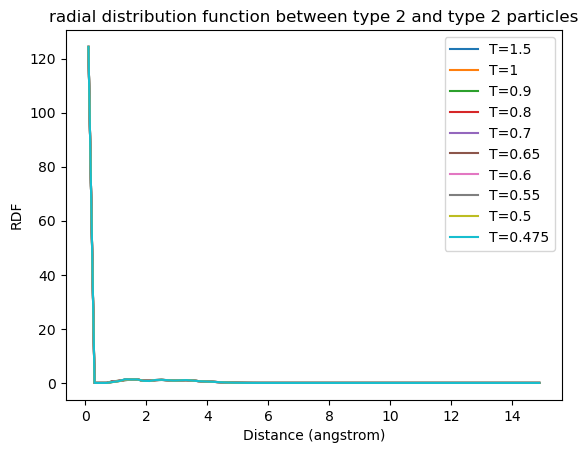

In [4]:
import matplotlib.pyplot as plt
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    plt.plot(rdf_dict[t][1].bins, rdf_dict[t][1].rdf, label=f"T={t}")
plt.xlabel('Distance (angstrom)')
plt.ylabel('RDF')
plt.legend()
plt.title('radial distribution function between type 2 and type 2 particles')
plt.show()

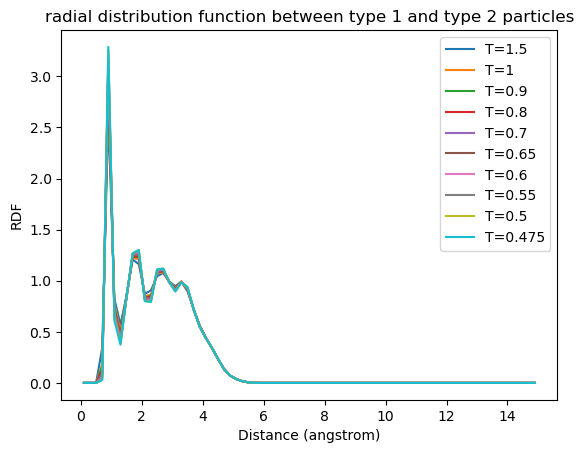

In [9]:
import matplotlib.pyplot as plt
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    plt.plot(rdf_dict[t][2].bins, rdf_dict[t][2].rdf, label=f"T={t}")
plt.xlabel('Distance (angstrom)')
plt.ylabel('RDF')
plt.legend()
plt.title('radial distribution function between type 1 and type 2 particles')
plt.show()

In [6]:
msd_dict = {}
for t in [1.5, 1, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]:
    msd_dict[t] = cal_msd(prod_data[str(t)])
for temp, msd_obj in msd_dict.items():
    break
msd_obj.results['msds_by_particle'].mean(axis=1).shape
msd_obj.times

array([0.        , 0.00048888, 0.00097776, 0.00146665, 0.00195553,
       0.00244441, 0.00293329, 0.00342217, 0.00391106, 0.00439994,
       0.00488882, 0.0053777 , 0.00586659, 0.00635547, 0.00684435,
       0.00733323, 0.00782211, 0.008311  , 0.00879988, 0.00928876,
       0.00977764, 0.01026652, 0.01075541, 0.01124429, 0.01173317,
       0.01222205, 0.01271094, 0.01319982, 0.0136887 , 0.01417758,
       0.01466646, 0.01515535, 0.01564423, 0.01613311, 0.01662199,
       0.01711087, 0.01759976, 0.01808864, 0.01857752, 0.0190664 ,
       0.01955528, 0.02004417, 0.02053305, 0.02102193, 0.02151081,
       0.0219997 , 0.02248858, 0.02297746, 0.02346634, 0.02395522,
       0.02444411, 0.02493299, 0.02542187, 0.02591075, 0.02639963,
       0.02688852, 0.0273774 , 0.02786628, 0.02835516, 0.02884405,
       0.02933293, 0.02982181, 0.03031069, 0.03079957, 0.03128846,
       0.03177734, 0.03226622, 0.0327551 , 0.03324398, 0.03373287,
       0.03422175, 0.03471063, 0.03519951, 0.03568839, 0.03617

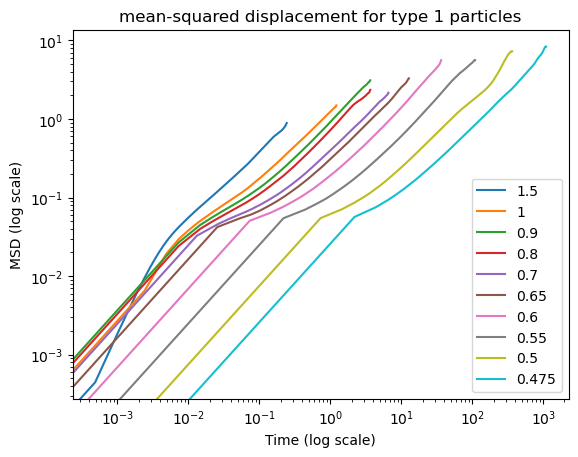

In [7]:
import matplotlib.pyplot as plt
for temp, msd_obj in msd_dict.items():

    # Ensure to use loglog for both axes
    plt.loglog(msd_obj.times,
               msd_obj.run().results['msds_by_particle'].mean(axis=1),
               label=f'{temp}')

plt.xlabel('Time (log scale)')
plt.ylabel('MSD (log scale)')
plt.title('mean-squared displacement for type 1 particles')
plt.legend()
plt.show()

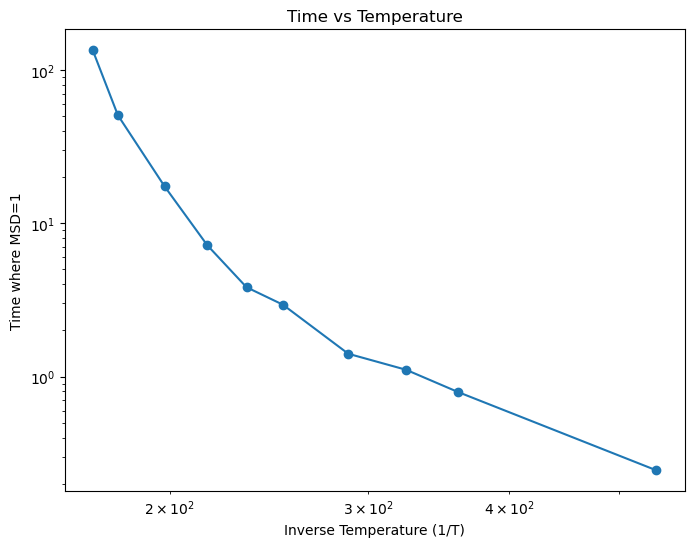

In [8]:
import numpy as np
def find_time_for_msd(msd_obj):
    msd_obj.run()
    # Find the index where the MSD first exceeds 1
    try:
        index = np.where(msd_obj.run().results['msds_by_particle'].mean(axis=1) >= 1)[0][0]
    except:
        index = len(msd_obj.times) - 1
    # Return the time at that index
    return msd_obj.times[index]

times_msd_1 = {}
temperatures = []

for temp_str, msd_obj in msd_dict.items():
    # Extract numerical value of temperature from the string (assuming the format is like '300K')
    temp = temp_str * 360
    temperatures.append(temp)
    
    # Find the time where MSD first reaches 1 and store it
    time = find_time_for_msd(msd_obj)
    times_msd_1[temp_str] = time

# Now let's create the log-log plot
# Convert lists to numpy arrays for easier manipulation
temperatures = np.array(temperatures)
times = np.array(list(times_msd_1.values()))

plt.figure(figsize=(8, 6))
plt.loglog(temperatures, times, 'o-')  # 'o-' creates a line plot with circle markers

plt.xlabel('Inverse Temperature (1/T)')
plt.ylabel('Time where MSD=1')
plt.title('Time vs Temperature')
plt.show()